---
# Task #1: Iris Flower Classification
### _Author : SANDHYA S_
### _Date: 09 August '21_
### _Problem Statement: Perform Iris flower classification using Supervised ML_
### _Dataset: http://archive.ics.uci.edu/ml/datasets/Iris_
---

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

## Loading Data

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = data.set_index('Id').rename(columns={'SepalLengthCm': 'Sepal Length',
                                           'SepalWidthCm': 'Sepal Width',
                                           'PetalLengthCm': 'Petal Length',
                                           'PetalWidthCm': 'Petal Width'})
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
# Structure of data
data.shape

(150, 5)

In [6]:
# Checking for Null values
data.isna().sum().to_frame('Null Values')

,Null Values
Sepal Length,0
Sepal Width,0
Petal Length,0
Petal Width,0
Species,0


In [7]:
# Statistics of Data
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# count of each species
data.Species.value_counts().to_frame('count')

,count
Iris-virginica,50
Iris-versicolor,50
Iris-setosa,50


In [9]:
# Correlation between Variables
data.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


---

# Visualization

In [10]:
plt.rcParams['figure.figsize'] = (10,5)

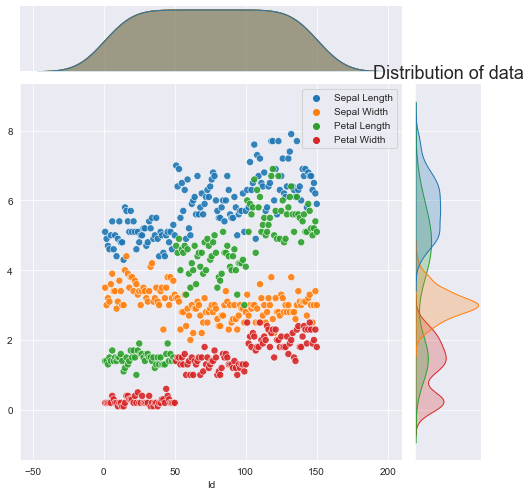

In [11]:
# Plotting Distribution of data
sns.jointplot(data=data, s=50, alpha=0.9, height=7)
plt.title('Distribution of data', fontsize=18)
plt.show()

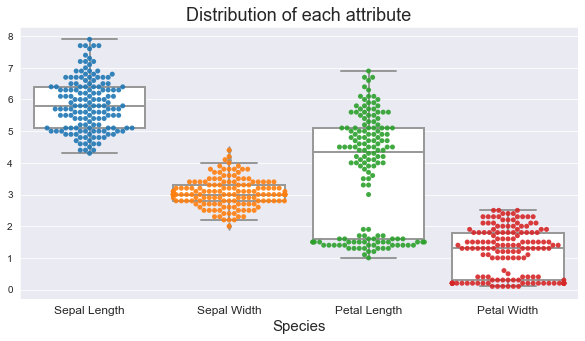

In [12]:
# Data distribution of each column
plt.title('Distribution of each attribute', fontsize=18)
sns.boxplot(data=data, color='white', linewidth=2)
sns.swarmplot(data=data, s=5, alpha=0.9)
plt.xticks(fontsize=12)
plt.xlabel('Species', fontsize=15)
plt.show()

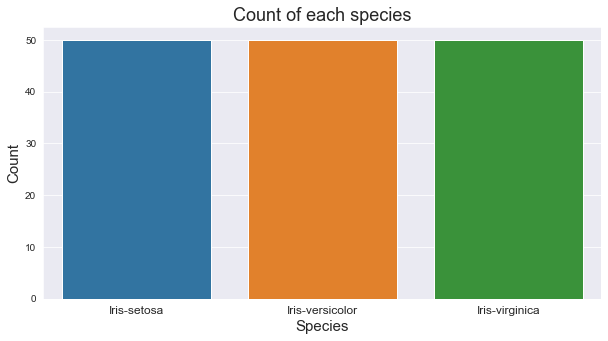

In [13]:
plt.title('Count of each species', fontsize=18)
sns.countplot(data.Species)
plt.xticks(fontsize=12)
plt.xlabel('Species', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [14]:
data[['Petal Length', 'Petal Width']].corr()

,Petal Length,Petal Width
Petal Length,1.000000,0.962757
Petal Width,0.962757,1.000000


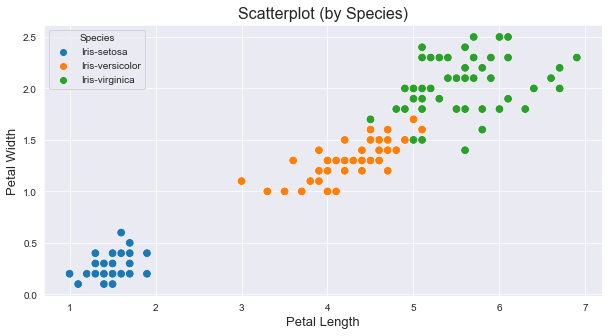

In [15]:
sns.scatterplot(data['Petal Length'], data['Petal Width'], s=75, hue=data['Species'])
plt.title('Scatterplot (by Species)', fontsize=16)
plt.xlabel('Petal Length', fontsize=13)
plt.ylabel('Petal Width', fontsize=13)
plt.show()

---

# K-Nearest Neighbors (KNN)

In [16]:
# Importing Libraries
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Creating Training & Testing Set

In [17]:
X = data.drop('Species', axis=1)
y = data['Species']
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (150, 4)
Shape of y: (150,)


In [18]:
# Splitting data into Training & Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
# Structure of each set in Train & Test data
print(f'X_train: {X_train.shape}\tX_test: {X_test.shape}\
      \ny_train: {y_train.shape}\t\ty_test: {y_test.shape}')

X_train: (120, 4)	X_test: (30, 4)      
y_train: (120,)		y_test: (30,)


## Modeling & Fitting

In [20]:
model = neighbors.KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

## Making Predictions

In [21]:
y_pred = model.predict(X_test)
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
Id,,
15,Iris-setosa,Iris-setosa
99,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
17,Iris-setosa,Iris-setosa
132,Iris-virginica,Iris-virginica
57,Iris-versicolor,Iris-versicolor
142,Iris-virginica,Iris-virginica
45,Iris-setosa,Iris-setosa
30,Iris-setosa,Iris-setosa


## Evaluation

In [22]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


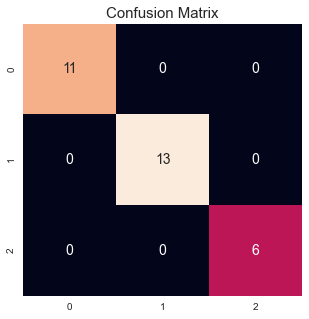

In [23]:
plt.figure(figsize=(5,5))
plt.title('Confusion Matrix', fontsize=15)
sns.heatmap(matrix, annot=True, cbar=False, annot_kws={'size': 14})
plt.show()

In [24]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


---
## _Thank You!_